# 1.0 Event Analysis

In [1]:
# Import useful libraries
import gdeltxp
import gdeltviz
import operator
import scipy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from math import isnan
from collections import Counter
from collections import OrderedDict 
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# Declare global variables
all_events = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/all_events.csv').sort_values('SQLDATE', ascending=1)
goldstein_codes = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/goldstein_codes.csv')
event_codes = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/event_codes.csv')
events, goldstein = {}, {}

# Populate event names dictionary
for index, row in event_codes.iterrows():
    events[row.CAMEOEVENTCODE] = row.EVENTDESCRIPTION
events[106] = 'unknown'
events[256] = 'unknown'

# Populate goldstein scale dictionary
for index, row in goldstein_codes.iterrows():
    goldstein[int(row.CAMEOEVENTCODE)] = row.GOLDSTEINSCALE
goldstein[106] = 0
goldstein[256] = 0

print(all_events.columns)

Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass',
       'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone',
       'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode',
       'Actor1Geo_ADM1Code', 'Actor1Geo_ADM2Code', 'Actor1Geo_Lat',
       'Actor1Geo_Long', 'Actor1Geo_FeatureID', 'Actor2Geo_Type',
       'Actor2Geo_FullName', 'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code',
       'Actor2Geo_ADM2Code', 'Actor2Geo_Lat', 'Act

In [2]:
gdeltxp.eventsSummary(all_events)

Total Events: 30530
Total Sources: 35524
Total Articles: 202005
Total Mentions: 213161


## 1.2 Event Quad Classes

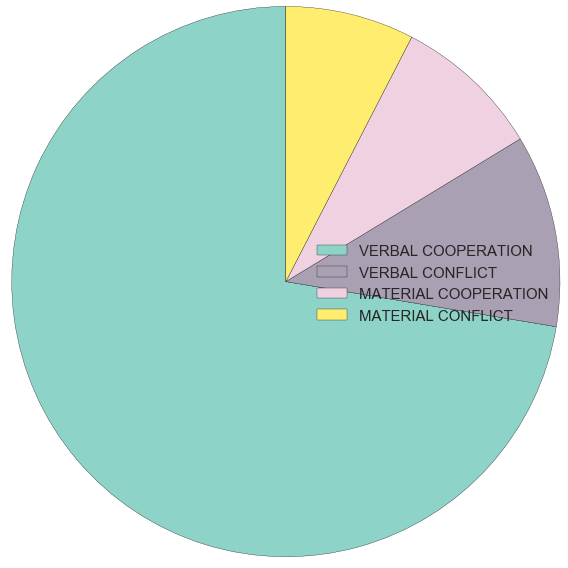

In [3]:
event_classes = {1:'VERBAL COOPERATION', 2:'MATERIAL COOPERATION', 3:'VERBAL CONFLICT', 4:'MATERIAL CONFLICT'}
event_quads = OrderedDict(sorted(Counter(all_events.QuadClass).items(), key=lambda x: x[1], reverse=True))
gdeltviz.pieChart([event_classes[x] for x in list(event_quads.keys())], list(event_quads.values()))

## 1.3 Event Root Codes

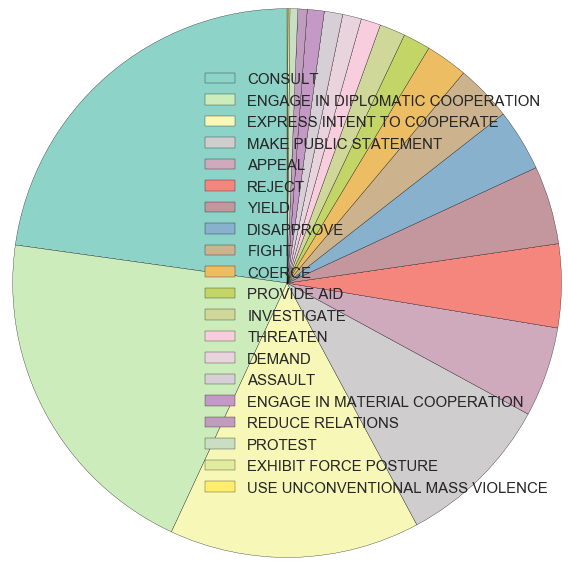

In [4]:
prominent_events = OrderedDict(sorted(Counter(all_events.EventRootCode).items(), key=lambda x: x[1], reverse=True))
gdeltviz.pieChart([events[x] for x in list(prominent_events.keys())], list(prominent_events.values()))

{'REDUCE RELATIONS': 167, 'INVESTIGATE': 462, 'PROTEST': 140, 'FIGHT': 1013, 'PROVIDE AID': 491, 'ASSAULT': 331, 'APPEAL': 1619, 'THREATEN': 354, 'EXPRESS INTENT TO COOPERATE': 4508, 'COERCE': 756, 'EXHIBIT FORCE POSTURE': 34, 'YIELD': 1408, 'ENGAGE IN MATERIAL COOPERATION': 304, 'CONSULT': 6956, 'USE UNCONVENTIONAL MASS VIOLENCE': 17, 'DISAPPROVE': 1116, 'DEMAND': 338, 'MAKE PUBLIC STATEMENT': 2819, 'REJECT': 1502, 'ENGAGE IN DIPLOMATIC COOPERATION': 6195}


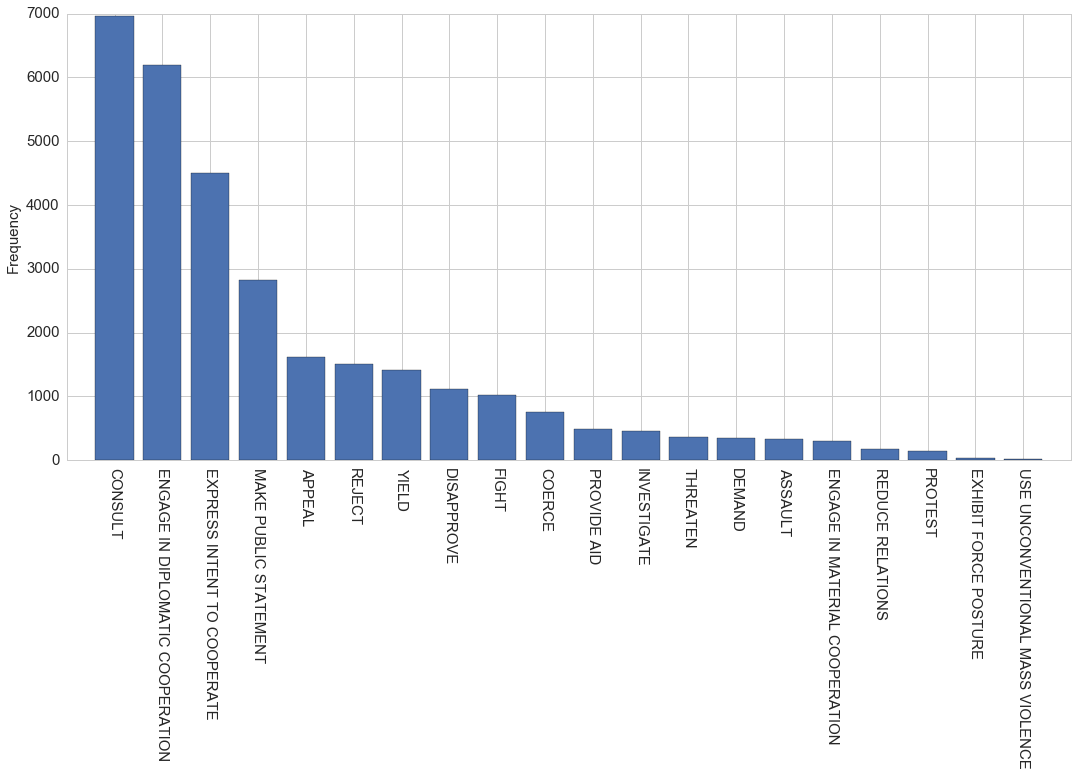

In [5]:
event_labels = [events[x] for x in list(prominent_events.keys())]
event_values = list(prominent_events.values())

ind = np.arange(len(event_values)) 

width = 0.5
print(dict(zip(event_labels, event_values)))

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_ylabel('Frequency' , fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.bar(np.arange(len(event_values)), event_values, align='center')
ax.set_xticks(np.arange(0, len(event_labels), 1))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(event_labels)])
ax.set_xticklabels(event_labels[::1])
plt.xlim([-1,len(event_values)])
plt.show()

EVENT ROOT CODE: Goldstein, Frequency
MAKE PUBLIC STATEMENT: 0.0, 2819
APPEAL: 3.0, 1619
EXPRESS INTENT TO COOPERATE: 4.0, 4508
CONSULT: 1.0, 6956
ENGAGE IN DIPLOMATIC COOPERATION: 3.5, 6195
ENGAGE IN MATERIAL COOPERATION: 6.0, 304
PROVIDE AID: 7.0, 491
YIELD: 5.0, 1408
INVESTIGATE: -2.0, 462
DEMAND: -5.0, 338
DISAPPROVE: -2.0, 1116
REJECT: -4.0, 1502
THREATEN: -6.0, 354
PROTEST: -6.5, 140
EXHIBIT FORCE POSTURE: -7.2, 34
REDUCE RELATIONS: -4.0, 167
COERCE: -7.0, 756
ASSAULT: -9.0, 331
FIGHT: -10.0, 1013
USE UNCONVENTIONAL MASS VIOLENCE: -10.0, 17


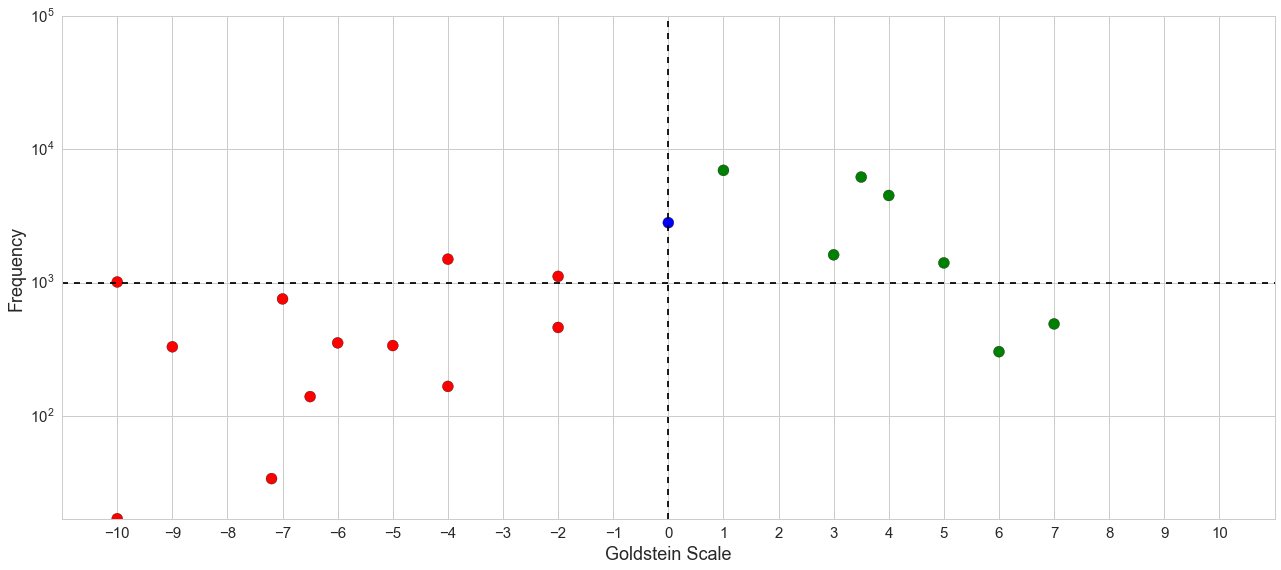

In [6]:
gdeltviz.goldsteinScatter(all_events, events, goldstein)

# 2.0 Event Signals

## 2.1 Activity Time Series

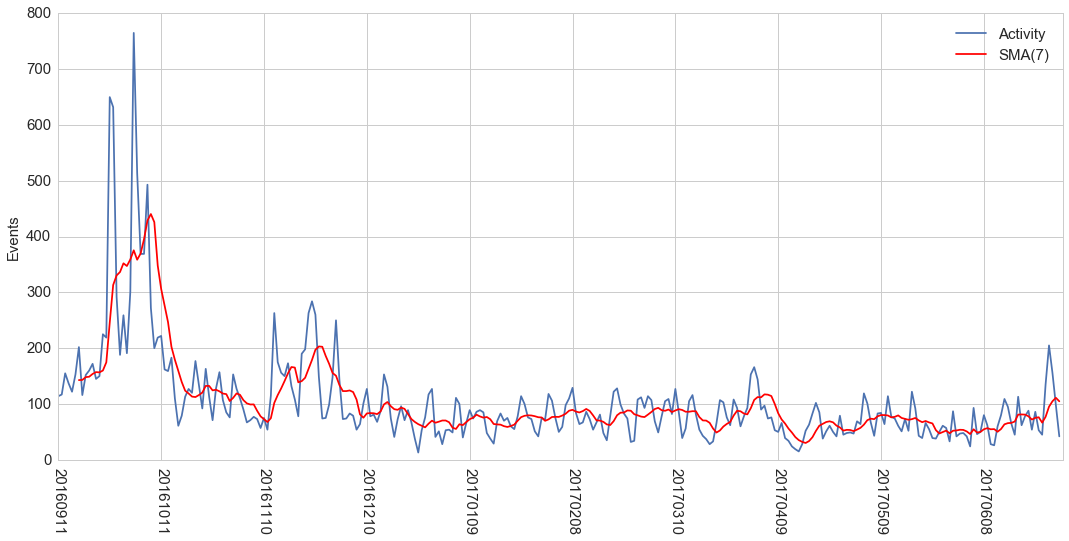

In [7]:
labels = sorted([key for key in Counter(all_events['SQLDATE']).keys()])
ind = np.arange(len(labels)) 
window = 7

activity = [len(all_events.loc[all_events['SQLDATE'] == key]) for key in labels]
activity_sma = gdeltxp.movingAverage(activity, window)

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Events' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, len(labels), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::30])
plt.plot(ind, activity, label='Activity')
plt.plot(ind[len(activity)-len(activity_sma):], activity_sma, label='SMA(%s)'%window, c='r')
plt.legend(loc='best', fontsize=15)
plt.show()

## 2.1 Tone Time Series

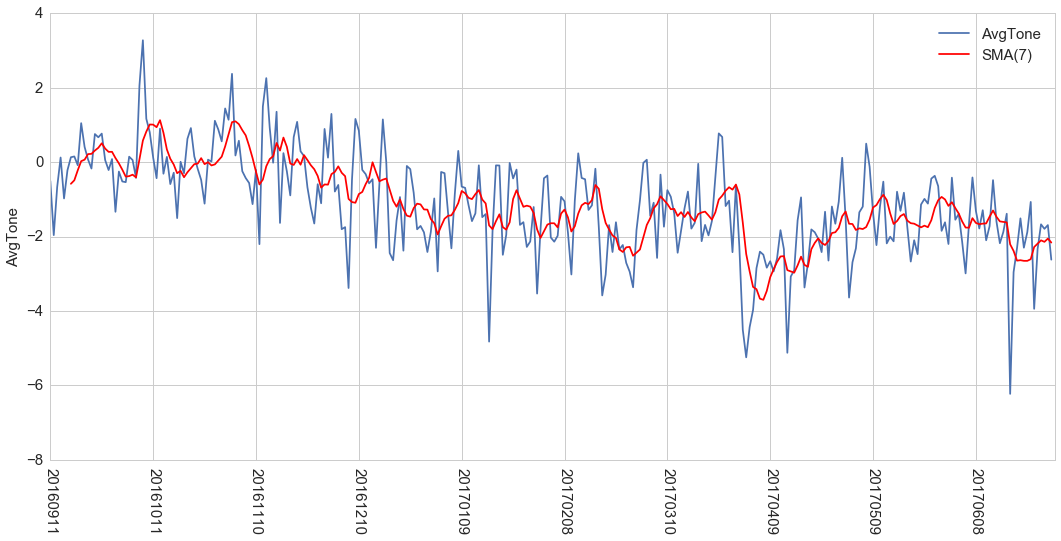

In [8]:
labels = sorted([key for key in Counter(all_events['SQLDATE']).keys()])
tone = [np.mean(all_events.loc[all_events['SQLDATE'] == key, 'AvgTone']) for key in labels]
#tone_std = [np.std(all_events.loc[all_events['SQLDATE'] == key, 'AvgTone']) for key in labels]
ind = np.arange(len(labels)) 
window = 7

tone_sma = gdeltxp.movingAverage(tone, window)

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('AvgTone' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, len(labels), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::30])
plt.plot(ind, tone, label='AvgTone')
plt.plot(ind[len(tone)-len(tone_sma):], tone_sma, label='SMA(%s)'%window, c='r')
#plt.plot(ind[len(tone)-len(tone_std):], tone_std, label='STD', c='grey')
plt.legend(loc='best', fontsize=15)
plt.show()


## 2.2. Goldstein Time Series

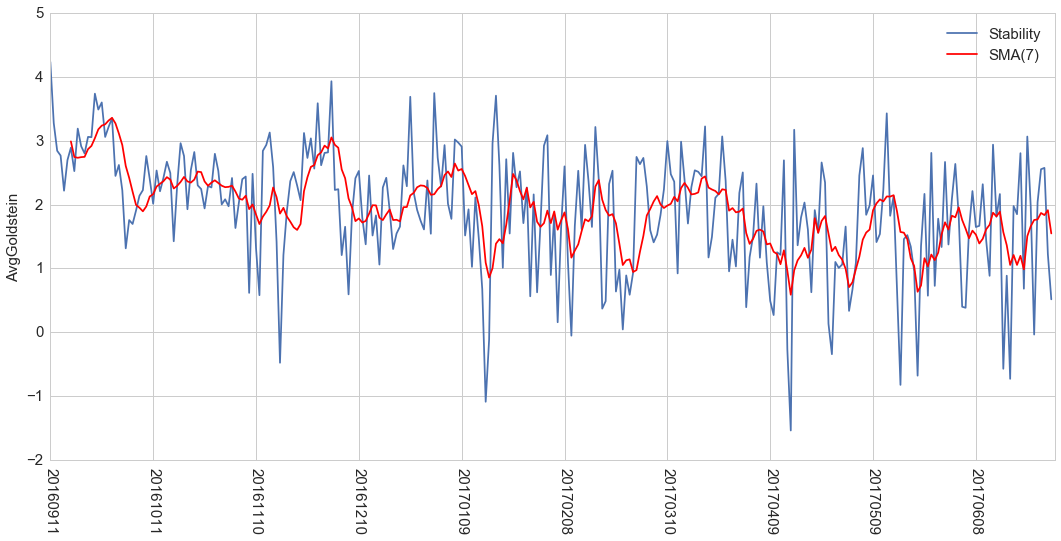

In [9]:
labels = sorted([key for key in Counter(all_events['SQLDATE']).keys()])
stability = [np.mean(all_events.loc[all_events['SQLDATE'] == key, 'GoldsteinScale']) for key in labels]
ind = np.arange(len(labels)) 
window = 7

stability_sma = gdeltxp.movingAverage(stability, window)

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('AvgGoldstein' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, len(labels), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::30])
plt.plot(ind, stability, label='Stability')
plt.plot(ind[len(stability)-len(stability_sma):], stability_sma, label='SMA(%s)'%window, c='r')
plt.legend(loc='best', fontsize=15)
plt.show()

## 2.3 Stability/Tone Time Series

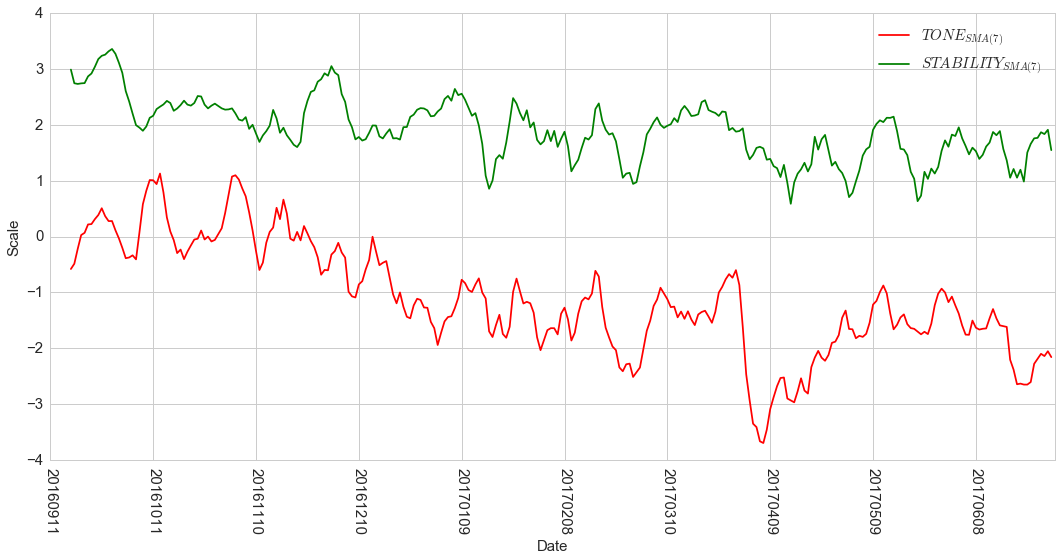

In [10]:
labels = sorted([key for key in Counter(all_events['SQLDATE']).keys()])
ind = np.arange(len(labels)) 
window = 7

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Scale' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, len(labels), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::30])
plt.plot(ind[len(tone)-len(tone_sma):], tone_sma, label='$TONE_{SMA(%s)}$'%window, c='r')
plt.plot(ind[len(stability)-len(stability_sma):], stability_sma, label='$STABILITY_{SMA(%s)}$'%window, c='g')
plt.legend(loc='best', fontsize=15)
plt.show()

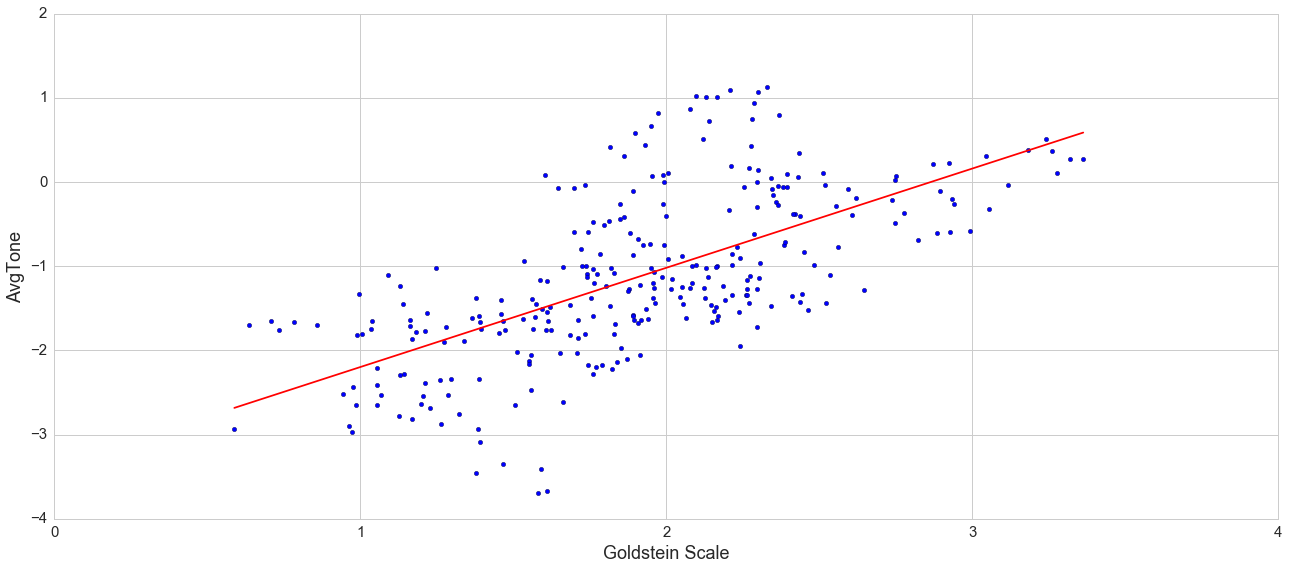

In [11]:
fig, ax = plt.subplots(figsize= (18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
plt.scatter(stability_sma,tone_sma) #s=120
plt.plot(np.unique(stability_sma), np.poly1d(np.polyfit(stability_sma, tone_sma, 1))(np.unique(stability_sma)), c='r')
ax.set_xticks(np.arange(0, 5, 1))
ax.set_xlabel('Goldstein Scale', fontsize=18)
ax.set_ylabel('AvgTone' , fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.xlim([0,4])
plt.show()

In [12]:
sp.stats.spearmanr(tone_sma, stability_sma)

SpearmanrResult(correlation=0.69893165777312127, pvalue=2.1775801358395821e-43)

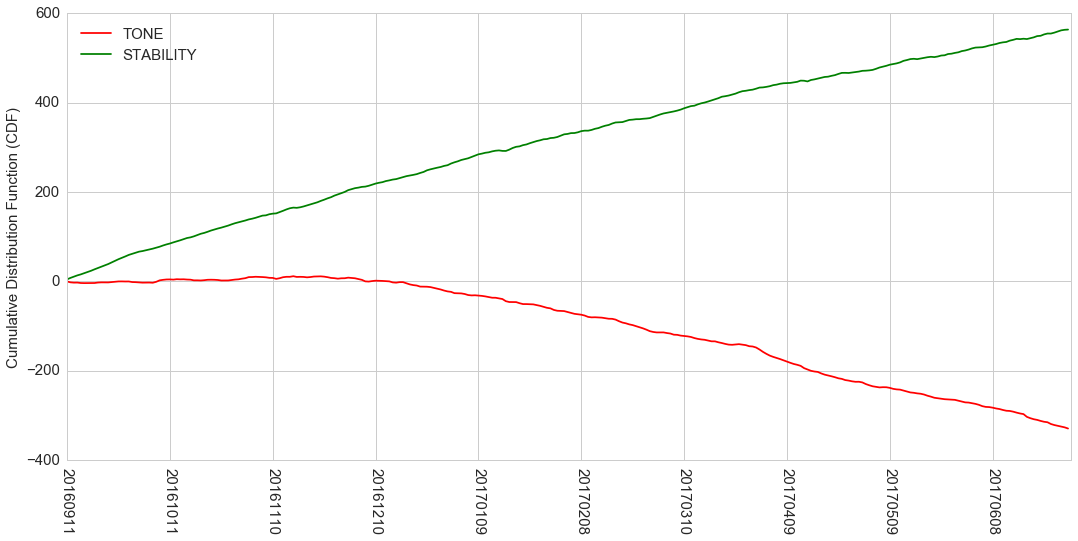

In [13]:
labels = sorted([key for key in Counter(all_events['SQLDATE']).keys()])
ind = np.arange(len(labels)) 

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Cumulative Distribution Function (CDF)' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, len(labels), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::30])
plt.plot(ind, np.cumsum(tone), label='TONE', c='r')
plt.plot(ind, np.cumsum(stability), label='STABILITY', c='g')
plt.legend(loc='best', fontsize=15)
plt.show()